In [1]:
!pip install scikit-learn==1.2.2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('HR_Dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
8834,0.98,0.83,5,211,3,0,0,0,support,medium
6063,0.99,0.77,3,190,4,0,0,0,hr,medium
3696,0.70,0.57,4,211,3,0,0,0,hr,high
11126,0.25,0.90,6,229,8,0,0,0,sales,medium
10018,0.77,0.70,4,232,3,0,0,0,sales,medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Departments,0
salary,0


we will predcict whether employee will leave or stay (left column)

In [8]:
df_copy = df.copy()
df_copy.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [9]:
#extra space remove
df_copy.rename(columns={'Departments ':'departments'},inplace=True)

In [10]:
df_copy.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
6076,0.35,0.54,2,124,3,0,0,0,support,low
5032,0.83,0.87,3,230,3,0,0,1,RandD,medium
9671,0.95,0.53,4,143,3,0,0,0,support,low
7484,0.68,0.88,5,256,2,0,0,0,technical,medium
12831,0.39,0.37,5,156,4,0,0,0,sales,medium


In [11]:
df_copy.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
df_copy.duplicated().any()

True

In [13]:
df_copy[df_copy.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [14]:
#lets drop 3008 rows as they are duplicates
df_copy = df_copy.drop_duplicates()
df_copy.shape

(11991, 10)

In [15]:
df_copy['left'].value_counts()

,count
left,
0,10000
1,1991


we can see imbalanced dataset

<Axes: xlabel='left'>

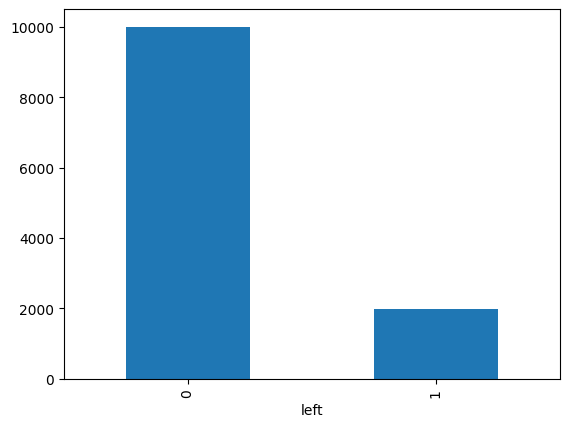

In [16]:
df_copy['left'].value_counts().plot(kind='bar')

In [17]:
X = df_copy.drop('left',axis=1)
y = df_copy['left']

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [19]:
int_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.to_list()
int_cols.remove('left')
int_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [20]:
#now lets standardize and encode too
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),int_cols),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
],remainder='passthrough')

Let me help explain what this code is doing in detail. This is a crucial step in the data preprocessing pipeline that standardizes numerical features and encodes categorical variables appropriately.

This code creates a ColumnTransformer object, which is a very useful scikit-learn tool that applies different transformations to different columns in your dataset. Let's break down each component:


Each transformer in the list is defined by a tuple with three elements:
1. A name for the transformation (like 'num', 'nominal', 'ordinal')
2. The transformer object to apply
3. The columns to transform

Let's examine each transformation:

The numeric transformation ('num'):
```python
('num', StandardScaler(), int_cols)
```
This applies standardization to your integer columns. StandardScaler subtracts the mean and divides by the standard deviation, making all numeric features have mean=0 and variance=1. This is important because it puts all numerical features on the same scale, preventing features with larger values from dominating the model training.

The nominal transformation ('nominal'):
```python
('nominal', OneHotEncoder(), ['departments'])
```
This creates dummy variables for the departments column. For example, if you have departments like ['HR', 'Sales', 'Tech'], it will create three new binary columns, where each row will have a 1 in the column corresponding to its department and 0s elsewhere.

The ordinal transformation ('ordinal'):
```python
('ordinal', OrdinalEncoder(), ['salary'])
```
This transforms the salary column (which I assume has ordered categories like 'low', 'medium', 'high') into numerical values while preserving the order. For example, 'low' might become 0, 'medium' becomes 1, and 'high' becomes 2.

The `remainder='passthrough'` parameter tells the transformer what to do with any columns not explicitly mentioned in any of the transformers. 'passthrough' means these columns will be included in the output unchanged. Other options would be 'drop' to exclude them or a transformer to apply to all remaining columns.

This preprocessing setup is particularly well-thought-out because it:
1. Handles different types of features appropriately
2. Preserves the ordinal nature of salary categories
3. Creates proper dummy variables for categorical departments
4. Standardizes numerical features to prevent scale issues

Would you like me to explain any of these concepts in more detail? For example, we could dive deeper into why standardization is important, or how one-hot encoding works under the hood.


In [21]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression())

])

Let me explain this Pipeline code and why it's such a powerful pattern in machine learning workflows. The Pipeline class is one of the most useful tools in scikit-learn, as it helps us create clean, reproducible machine learning processes.

Here's what your code is doing:
```python
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # First step: apply our preprocessing transformations
    ('model', LogisticRegression())  # Second step: train our logistic regression model
])
```

Think of this pipeline like an assembly line in a factory. Just as a car moves from station to station during assembly, your data flows through each step of the pipeline in sequence. The beauty of this approach is that it handles all the complexity of preprocessing and model training as one unified process.

When you call `pipeline.fit(X, y)`, several things happen automatically in sequence:
1. The preprocessor (which we created earlier) transforms your raw data by:
   - Standardizing the numeric columns
   - One-hot encoding the departments
   - Ordinally encoding the salary categories
2. The transformed data is then immediately passed to the LogisticRegression model for training

Similarly, when you later call `pipeline.predict(new_data)`, the pipeline:
1. Applies the exact same preprocessing steps to your new data (using the parameters learned during training)
2. Passes the transformed data through the trained model to get predictions

This approach has several important advantages:
- It prevents data leakage by ensuring that all preprocessing parameters are learned only from the training data
- It keeps your code organized and reduces the chance of errors
- It makes it much easier to deploy your model, since all preprocessing steps are packaged together
- It simplifies cross-validation, as the entire pipeline can be treated as a single estimator

Think of it like a recipe: instead of having to remember and execute each step separately (measure ingredients, mix, knead, bake), you have a single procedure that ensures everything happens in the right order with the right parameters.

Here's a concrete example of how you would use this pipeline:
```python
# Fit the entire pipeline
pipeline.fit(X_train, y_train)

# Make predictions - preprocessing happens automatically
predictions = pipeline.predict(X_test)

# Get cross-validation scores for the whole process
cv_scores = cross_val_score(pipeline, X, y, cv=5)
```

Would you like me to explain more about how the pipeline handles the preprocessing steps internally, or would you prefer to explore how to evaluate and tune this pipeline's performance?

In [22]:
from sklearn import set_config

set_config(display='diagram')

In [23]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)


In train_test_split from scikit-learn, the stratify=y parameter ensures that the class distribution of the target variable y is maintained in both the training and test datasets. This is particularly useful when you have imbalanced datasets, where some classes have significantly fewer samples than others.

Why Use stratify=y?
Imbalanced Classes: If your target variable y has an unequal number of samples for each class, a random split might result in a test set with missing or underrepresented classes.

Maintaining Proportions: Stratification ensures that the proportion of each class in the training and test datasets is the same as in the original dataset.


How It Works
Without stratify=y, train_test_split randomly splits the data. This could lead to an uneven class distribution between the train and test sets.
With stratify=y, the split ensures that the proportional representation of each class in the target variable is consistent in the train and test sets.

In [25]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [26]:
y_pred = pipeline.predict(X_test)

In [27]:
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

accuracy_score: 0.8370154230929554
precision_score: 0.5209580838323353
recall_score: 0.2185929648241206


In [28]:
#making a function for the above steps for predicting scores as well as making pipelines
def model_scorer(model_name,model):

    output=[]

    output.append(model_name)

    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    output.append(accuracy_score(y_test,y_pred))

    output.append(precision_score(y_test,y_pred))

    output.append(recall_score(y_test,y_pred))

    return output

In [29]:
model_dict={
    'logistic_regression':LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()

}

In [30]:
#loop for using all the models by itself
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [32]:
model_output

[['logistic_regression',
  0.8370154230929554,
  0.5209580838323353,
  0.2185929648241206],
 ['decision_tree', 0.9679032930387661, 0.883054892601432, 0.9296482412060302],
 ['random_forest', 0.9858274280950396, 0.989247311827957, 0.9246231155778895],
 ['XGB', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005]]

In [33]:
#random forest gives best results so we are gonna use it to make a model
#now lets standardize and encode too
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),int_cols),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
],remainder='passthrough')

In [34]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression())

])

In [35]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [36]:
import pickle

In [37]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)


In [38]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [40]:
#now for the test dataset
test_df = pd.read_csv('HR_Dataset_test.csv')

In [41]:
test_df.shape

(9, 9)

In [42]:
test_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.98,0.66,5,248,3,0,0,technical,medium
5,0.75,0.70,4,144,4,0,0,technical,high
6,1.00,0.41,4,174,3,0,0,technical,low
7,0.24,0.82,5,179,6,0,0,technical,medium
8,0.84,0.43,6,246,4,0,0,technical,medium


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     9 non-null      float64
 1   last_evaluation        9 non-null      float64
 2   number_project         9 non-null      int64  
 3   average_montly_hours   9 non-null      int64  
 4   time_spend_company     9 non-null      int64  
 5   Work_accident          9 non-null      int64  
 6   promotion_last_5years  9 non-null      int64  
 7   Departments            9 non-null      object 
 8   salary                 9 non-null      object 
dtypes: float64(2), int64(5), object(2)
memory usage: 780.0+ bytes


In [44]:
test_df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
Departments,0
salary,0


In [45]:
test_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [46]:
test_df = test_df.rename(columns={'Departments ':'departments'})

In [48]:
test_df.duplicated().any()

False

In [49]:
pred_test = pipeline_saved.predict(test_df)

In [50]:
print(pred_test)

[0 0 1 0 0 0 0 1 0]


In [52]:
pred_test_series = pd.Series(pred_test)

In [55]:
pred_test_df = pd.concat([test_df, pred_test_series], axis=1)
pred_test_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments,salary,0
0,0.38,0.53,2,157,3,0,0,sales,low,0
1,0.80,0.86,5,262,6,0,0,sales,medium,0
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,0
4,0.98,0.66,5,248,3,0,0,technical,medium,0
5,0.75,0.70,4,144,4,0,0,technical,high,0
6,1.00,0.41,4,174,3,0,0,technical,low,0
7,0.24,0.82,5,179,6,0,0,technical,medium,1
8,0.84,0.43,6,246,4,0,0,technical,medium,0


In [56]:
pred_test_df = pred_test_df.rename(columns={0: 'will_leave'})
pred_test_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments,salary,will_leave
0,0.38,0.53,2,157,3,0,0,sales,low,0
1,0.80,0.86,5,262,6,0,0,sales,medium,0
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,0
4,0.98,0.66,5,248,3,0,0,technical,medium,0
5,0.75,0.70,4,144,4,0,0,technical,high,0
6,1.00,0.41,4,174,3,0,0,technical,low,0
7,0.24,0.82,5,179,6,0,0,technical,medium,1
8,0.84,0.43,6,246,4,0,0,technical,medium,0


In [57]:
save = pred_test_df.to_csv('pred_test_df.csv', index=False)